In [2]:
import mysql.connector 

In [3]:
try:
    # Connect to the MySQL server
    connection = mysql.connector.connect(
        host="localhost",
        user="root",
        password="MySQL98",
        database="delhielection"
    )

    if connection.is_connected():
        print('Connected to MySQL database')

except mysql.connector.Error as error:
    print(f'Error connecting to MySQL database: {error}')

Connected to MySQL database


In [4]:
db_cursor=connection.cursor()
db_cursor.execute("show tables")
for i in db_cursor:
    print(i)

('2019_pcresults',)
('delhivoters',)
('pcresults_1999',)
('pcresults_2004',)
('pcresults_2009',)
('pcresults_2014',)
('pcresults_2019',)


In [5]:
db_cursor.rowcount

7

In [6]:
db_cursor.execute("""
    SELECT *
    FROM pcresults_2009 AS res_2009
    JOIN pcresults_2014 AS res_2014 ON res_2009.pc_no = res_2014.pc_no
    JOIN pcresults_2019 AS res_2019 ON res_2014.pc_no = res_2019.pc_no
""")
result = db_cursor.fetchall()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Nikhil Kumar Singh\AppData\Local\Temp\ipykernel_68\3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
df=pd.DataFrame(result)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,Chandni Chowk,55.21,Kapil Sibal,Indian National Congress,"2,00,710",1,Chandni Chowk,67.87,Harsh Vardhan,...,"1,36,320",1,Chandni Chowk,62.78,Dr. Harsh Vardhan,Bharatiya Janata Party,Jai Prakash Agarwal,Indian National Congress,"228,145",23.27
1,2,North East Delhi,52.35,Jai Parkash Aggarwal,Indian National Congress,"2,22,243",2,North East Delhi,67.32,Manoj Tiwari,...,"1,44,084",2,North East Delhi,63.86,Manoj Tiwari,Bharatiya Janata Party,Sheila Dikshit,Indian National Congress,"366,102",25.05
2,3,East Delhi,53.43,Sandeep Dikshit,Indian National Congress,"2,41,053",3,East Delhi,65.41,Maheish Girri,...,"1,90,463",3,East Delhi,61.7,Gautam Gambhir,Bharatiya Janata Party,Arvinder Singh Lovely,Indian National Congress,"391,222",31.11
3,4,New Delhi,55.83,Ajay Maken,Indian National Congress,"1,87,809",4,New Delhi,65.11,Meenakshi Lekhi,...,"1,62,708",4,New Delhi,56.91,Meenakshi Lekhi,Bharatiya Janata Party,Ajay Maken,Indian National Congress,"256,504",27.86
4,5,North West Delhi,47.63,Krishna Tirath,Indian National Congress,"1,84,433",5,North West Delhi,61.81,Dr. Udit Raj,...,"1,06,802",5,North West Delhi,58.97,Hans Raj,Bharatiya Janata Party,Gugan Singh,Aam Aadmi Party,"553,897",39.48


In [10]:
df.drop(df.columns[[6, 7, 12, 13, 17, 18, 20]], axis=1, inplace=True)

In [11]:
df.head()

,0,1,2,3,4,5,8,9,10,11,14,15,16,19
0,1,Chandni Chowk,55.21,Kapil Sibal,Indian National Congress,"2,00,710",67.87,Harsh Vardhan,Bharatiya Janata Party,"1,36,320",62.78,Dr. Harsh Vardhan,Bharatiya Janata Party,"228,145"
1,2,North East Delhi,52.35,Jai Parkash Aggarwal,Indian National Congress,"2,22,243",67.32,Manoj Tiwari,Bharatiya Janata Party,"1,44,084",63.86,Manoj Tiwari,Bharatiya Janata Party,"366,102"
2,3,East Delhi,53.43,Sandeep Dikshit,Indian National Congress,"2,41,053",65.41,Maheish Girri,Bharatiya Janata Party,"1,90,463",61.7,Gautam Gambhir,Bharatiya Janata Party,"391,222"
3,4,New Delhi,55.83,Ajay Maken,Indian National Congress,"1,87,809",65.11,Meenakshi Lekhi,Bharatiya Janata Party,"1,62,708",56.91,Meenakshi Lekhi,Bharatiya Janata Party,"256,504"
4,5,North West Delhi,47.63,Krishna Tirath,Indian National Congress,"1,84,433",61.81,Dr. Udit Raj,Bharatiya Janata Party,"1,06,802",58.97,Hans Raj,Bharatiya Janata Party,"553,897"


In [12]:
df.columns=["PC No", "PC Name", "TurnOut_09", "MP_09", "WinParty_09", "Margin_09", 
            "TurnOut_14", "MP_14", "WinParty_14", "Margin_14", 
            "TurnOut_19", "MP_19", "WinParty_19", "Margin_19" ]

In [13]:
df.head()

,PC No,PC Name,TurnOut_09,MP_09,WinParty_09,Margin_09,TurnOut_14,MP_14,WinParty_14,Margin_14,TurnOut_19,MP_19,WinParty_19,Margin_19
0,1,Chandni Chowk,55.21,Kapil Sibal,Indian National Congress,"2,00,710",67.87,Harsh Vardhan,Bharatiya Janata Party,"1,36,320",62.78,Dr. Harsh Vardhan,Bharatiya Janata Party,"228,145"
1,2,North East Delhi,52.35,Jai Parkash Aggarwal,Indian National Congress,"2,22,243",67.32,Manoj Tiwari,Bharatiya Janata Party,"1,44,084",63.86,Manoj Tiwari,Bharatiya Janata Party,"366,102"
2,3,East Delhi,53.43,Sandeep Dikshit,Indian National Congress,"2,41,053",65.41,Maheish Girri,Bharatiya Janata Party,"1,90,463",61.7,Gautam Gambhir,Bharatiya Janata Party,"391,222"
3,4,New Delhi,55.83,Ajay Maken,Indian National Congress,"1,87,809",65.11,Meenakshi Lekhi,Bharatiya Janata Party,"1,62,708",56.91,Meenakshi Lekhi,Bharatiya Janata Party,"256,504"
4,5,North West Delhi,47.63,Krishna Tirath,Indian National Congress,"1,84,433",61.81,Dr. Udit Raj,Bharatiya Janata Party,"1,06,802",58.97,Hans Raj,Bharatiya Janata Party,"553,897"


In [14]:
df.dtypes

PC No           int64
PC Name        object
TurnOut_09     object
MP_09          object
WinParty_09    object
Margin_09      object
TurnOut_14     object
MP_14          object
WinParty_14    object
Margin_14      object
TurnOut_19     object
MP_19          object
WinParty_19    object
Margin_19      object
dtype: object

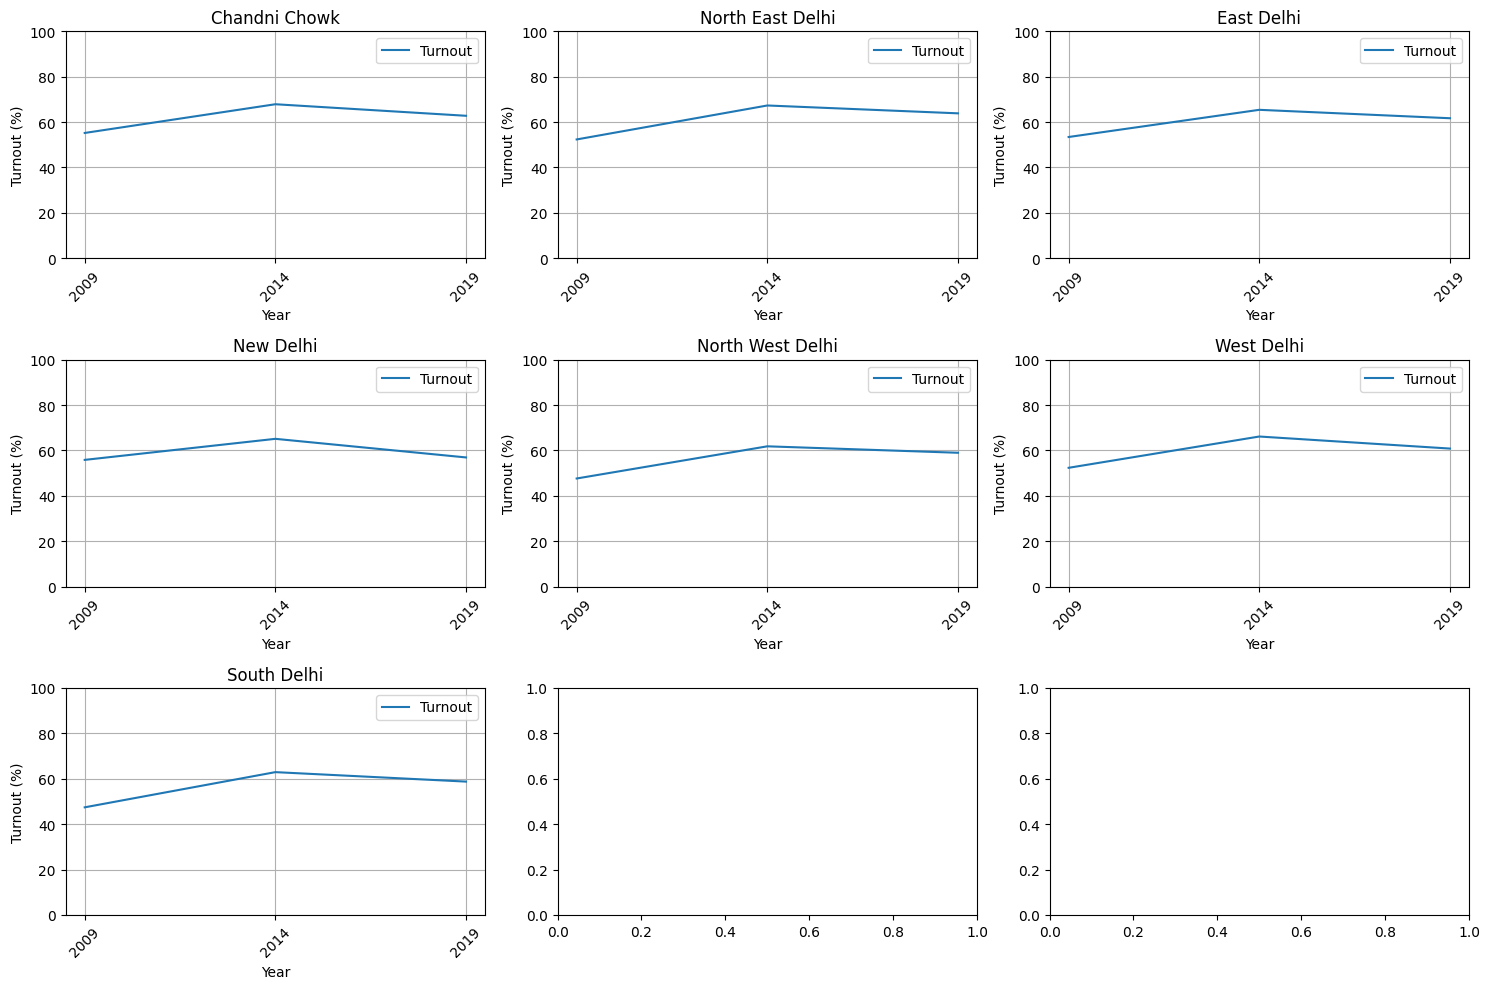

In [15]:
# Convert turnout columns to float
turnout_columns = ['TurnOut_09', 'TurnOut_14', 'TurnOut_19']
df[turnout_columns] = df[turnout_columns].astype(float)

# Determine the number of rows and columns for the subplot grid
num_rows = 3  # Number of rows
num_cols = 3  # Number of columns (assuming 9 constituencies)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Overall voting percentage for each parliamentary constituency
for i, ax in zip(df["PC No"], axes.flatten()):
    ax.set_title(df["PC Name"][df["PC No"] == i].values[0])  # Extracting PC Name for the current PC No
    sns.lineplot(ax=ax, x=['2009', '2014', '2019'], y=[df["TurnOut_09"][df["PC No"] == i].values[0], 
                                                         df["TurnOut_14"][df["PC No"] == i].values[0], 
                                                         df["TurnOut_19"][df["PC No"] == i].values[0]])
    ax.set_xlabel('Year')
    ax.set_ylabel('Turnout (%)')
    ax.set_ylim(0, 100)  # Set y-axis range from 0 to 100
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.grid(True)  # Show grid lines
    ax.legend(['Turnout'])  # Add legend

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
df["Margin_09"] = df["Margin_09"].str.replace(',', '')  # Remove commas
df["Margin_14"] = df["Margin_14"].str.replace(',', '')  # Remove commas
df["Margin_19"] = df["Margin_19"].str.replace(',', '')  # Remove commas

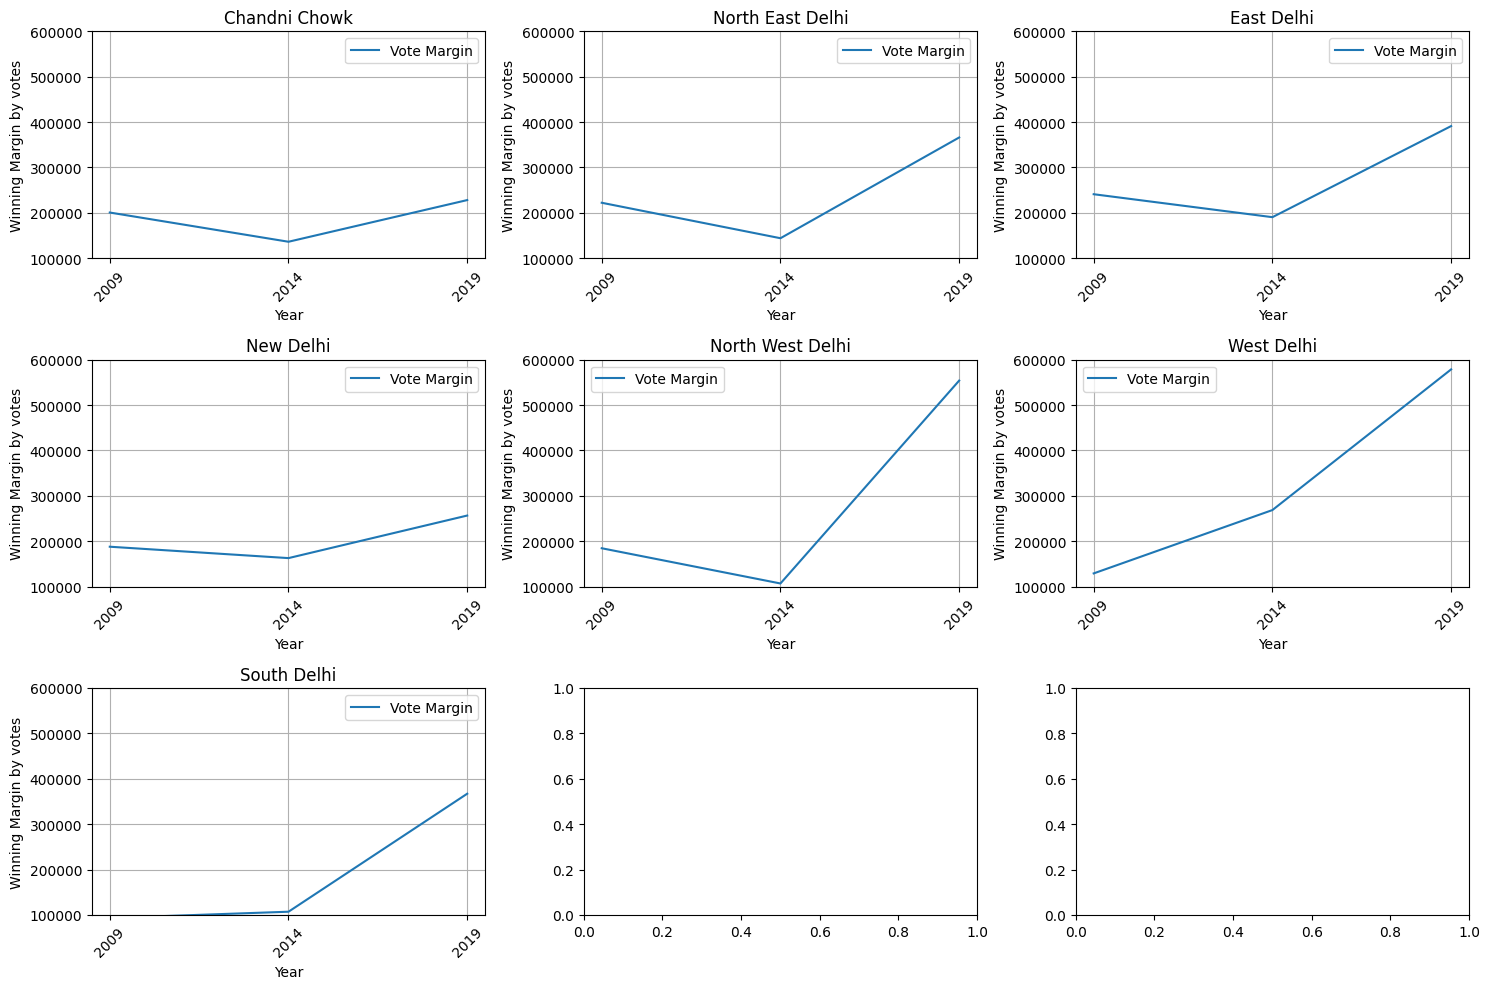

In [17]:
# Convert margin columns to int
turnout_columns = ['Margin_09', 'Margin_14', 'Margin_19']
df[turnout_columns] = df[turnout_columns].astype(int)

# Determine the number of rows and columns for the subplot grid
num_rows = 3  # Number of rows
num_cols = 3  # Number of columns (assuming 9 constituencies)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Overall voting percentage for each parliamentary constituency
for i, ax in zip(df["PC No"], axes.flatten()):
    ax.set_title(df["PC Name"][df["PC No"] == i].values[0])  # Extracting PC Name for the current PC No
    sns.lineplot(ax=ax, x=['2009', '2014', '2019'], y=[df["Margin_09"][df["PC No"] == i].values[0], 
                                                         df["Margin_14"][df["PC No"] == i].values[0], 
                                                         df["Margin_19"][df["PC No"] == i].values[0]])
    ax.set_xlabel('Year')
    ax.set_ylabel('Winning Margin by votes')
    ax.set_ylim(100000, 600000)  # Set y-axis range from 0 to 100
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.grid(True)  # Show grid lines
    ax.legend(['Vote Margin'])  # Add legend

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

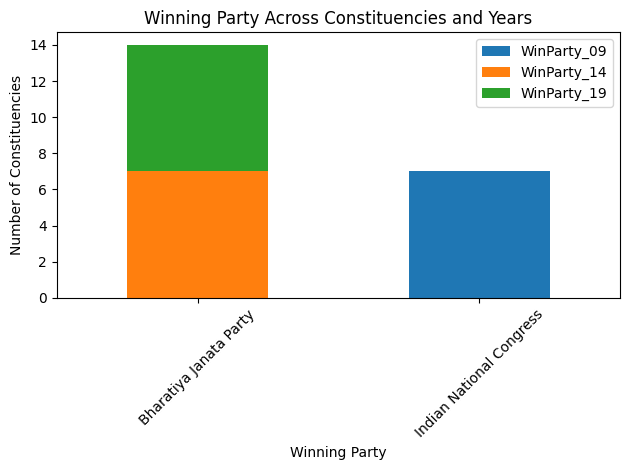

In [19]:
# Extracting relevant columns for winning parties and election years
winning_party_columns = ["WinParty_09", "WinParty_14", "WinParty_19"]

# Creating a new DataFrame with only the winning party columns
df_winning_parties = df[winning_party_columns]

# Counting occurrences of each winning party
party_counts = df_winning_parties.apply(pd.Series.value_counts)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
party_counts.plot(kind='bar', stacked=True)
plt.title('Winning Party Across Constituencies and Years')
plt.xlabel('Winning Party')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()